In [205]:
## USED Correlation + some more features FOR FEATURE ENGINEERING

In [206]:
## import necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')

In [207]:
df=pd.read_csv("UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [208]:
df.shape

(30000, 25)

In [209]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [211]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [212]:
# correlation within features

df.corr()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,-0.022199,-0.020270,0.019389,0.017982,0.024354,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,0.082316,0.023581,0.018749,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,-0.023472,-0.021602,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


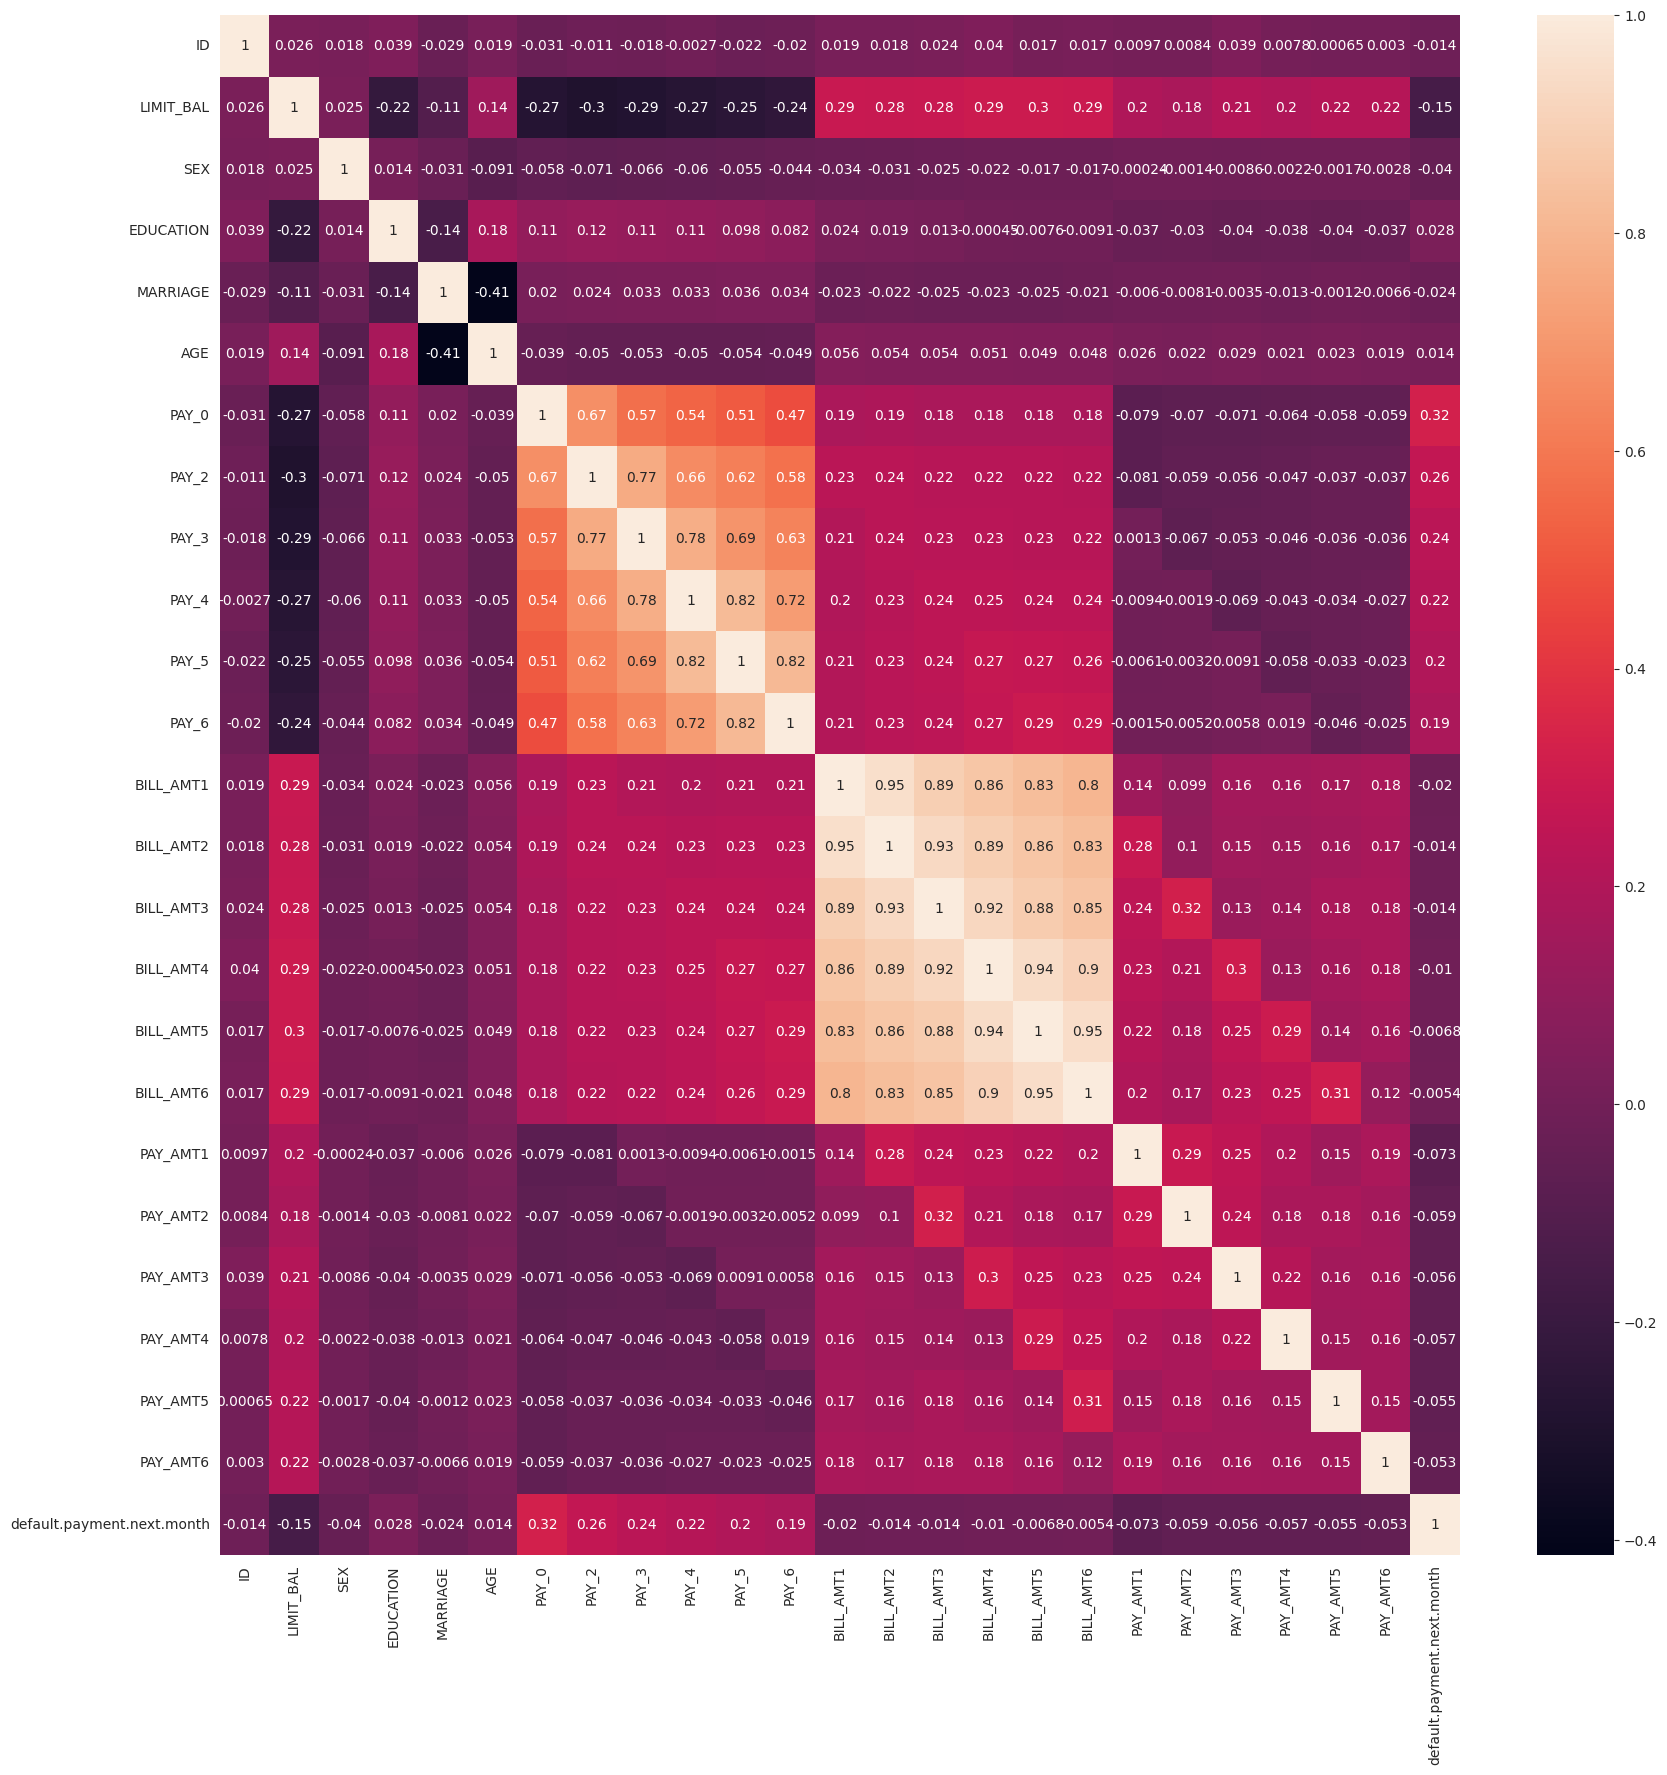

In [213]:

plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

## default.payment.next.month

In [214]:
df.rename(columns ={"default.payment.next.month": "default"}, inplace = True)

In [215]:
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


In [216]:
df["default"].unique()

array([1, 0])

In [217]:
df["default"].value_counts()

0    23364
1     6636
Name: default, dtype: int64

Text(0.5, 1.0, 'Default Payment Next Month')

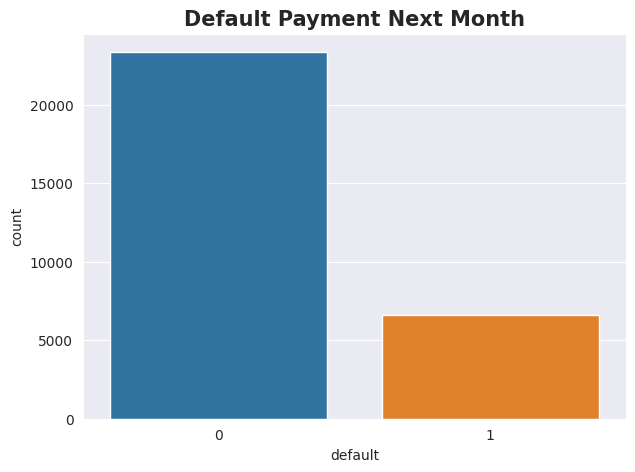

In [218]:
# 0= no default, 1= default
plt.figure(figsize=(7,5))
sns.countplot(x="default",order=[0,1],data=df).set_title("Default Payment Next Month",fontsize=15,fontdict={"weight": "bold"})

## Sex

In [219]:
df["SEX"].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

Text(0.5, 1.0, 'Sex')

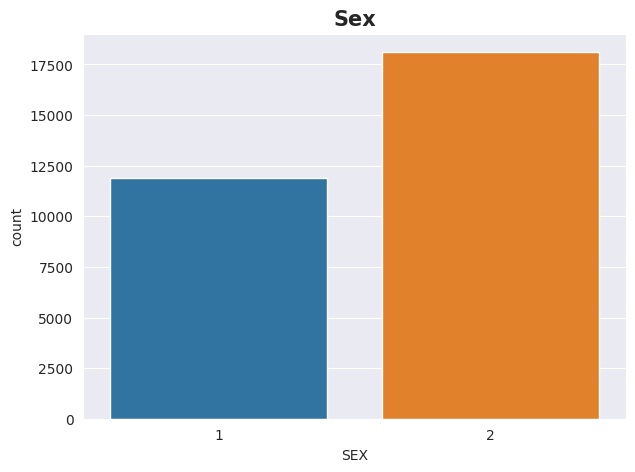

In [220]:
plt.figure(figsize=(7,5))
sns.countplot(x="SEX",order=[1,2],data=df).set_title("Sex",fontsize=15,fontdict={"weight": "bold"})

Text(0.5, 1.0, 'Sex')

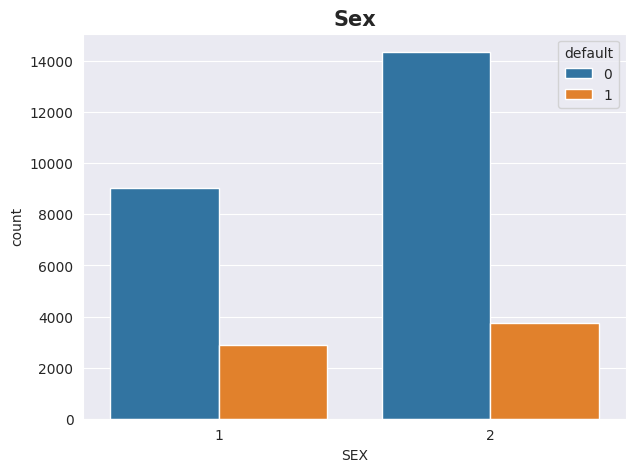

In [221]:
plt.figure(figsize=(7,5))
sns.countplot(x="SEX",order=[1,2],hue="default",data=df).set_title("Sex",fontsize=15,fontdict={"weight": "bold"})

## MARRIAGE

In [222]:
df["MARRIAGE"].unique()

array([1, 2, 3, 0])

In [223]:
df["MARRIAGE"].value_counts(ascending=True)

0       54
3      323
1    13659
2    15964
Name: MARRIAGE, dtype: int64

Text(0.5, 1.0, 'Marriage')

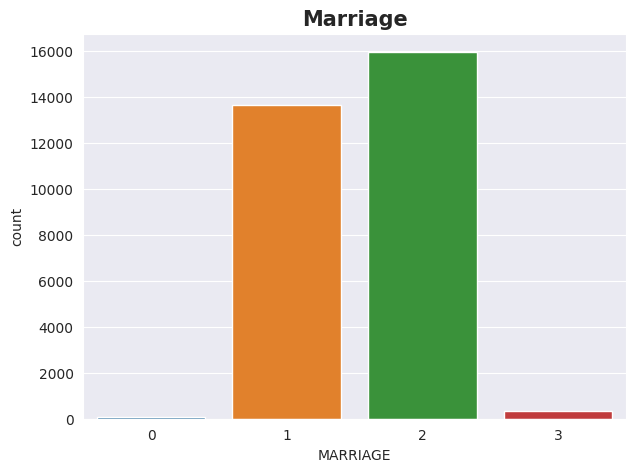

In [224]:
plt.figure(figsize=(7,5))
sns.countplot(x="MARRIAGE",order=[0,1,2,3],data=df).set_title("Marriage",fontsize=15,fontdict={"weight": "bold"})

Text(0.5, 1.0, 'Marriage')

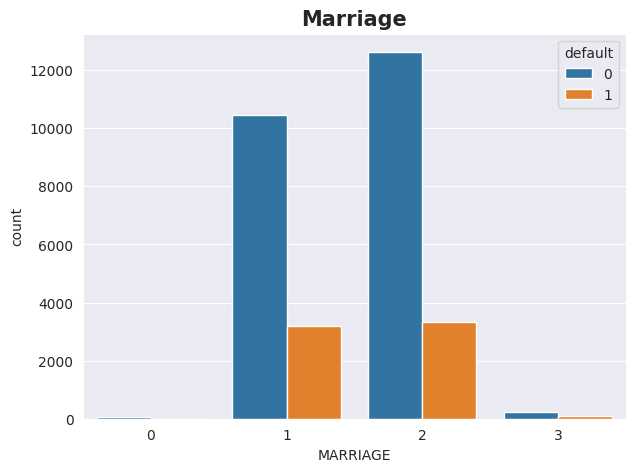

In [225]:
plt.figure(figsize=(7,5))
sns.countplot(x="MARRIAGE",order=[0,1,2,3],hue="default",data=df).set_title("Marriage",fontsize=15,fontdict={"weight": "bold"})

## EDUCATION 

In [226]:
df["EDUCATION"].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [227]:
df["EDUCATION"].value_counts(ascending=True)

0       14
6       51
4      123
5      280
3     4917
1    10585
2    14030
Name: EDUCATION, dtype: int64

Text(0.5, 1.0, 'EDUCATION')

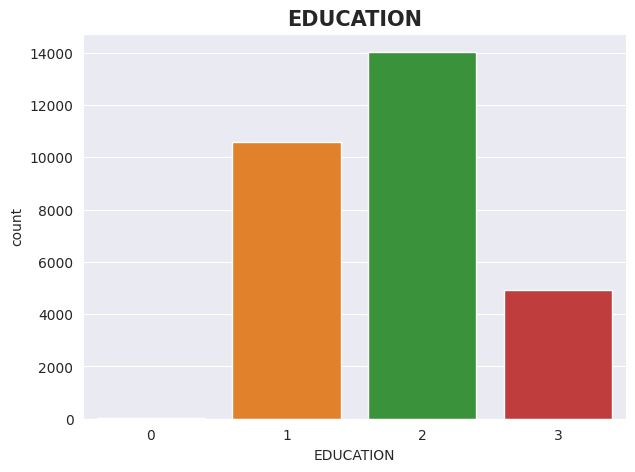

In [228]:
plt.figure(figsize=(7,5))
sns.countplot(x="EDUCATION",order=[0,1,2,3],data=df).set_title("EDUCATION",fontsize=15,fontdict={"weight": "bold"})

Text(0.5, 1.0, 'EDUCATION')

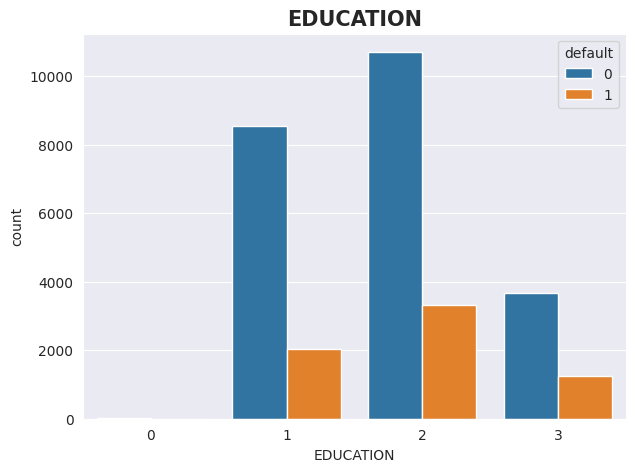

In [229]:
plt.figure(figsize=(7,5))
sns.countplot(x="EDUCATION",order=[0,1,2,3],hue="default",data=df).set_title("EDUCATION",fontsize=15,fontdict={"weight": "bold"})

##  Age

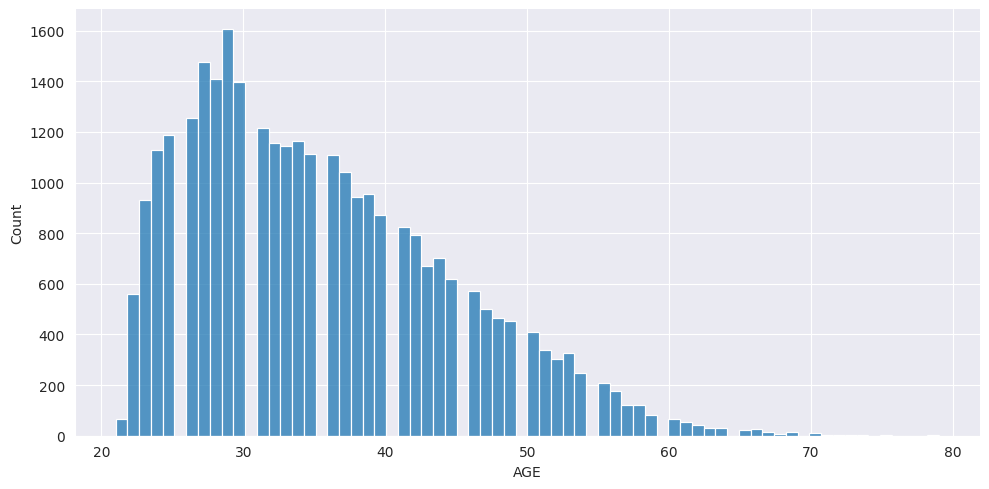

In [230]:
sns.displot(data=df, x="AGE",height=5, aspect=2)

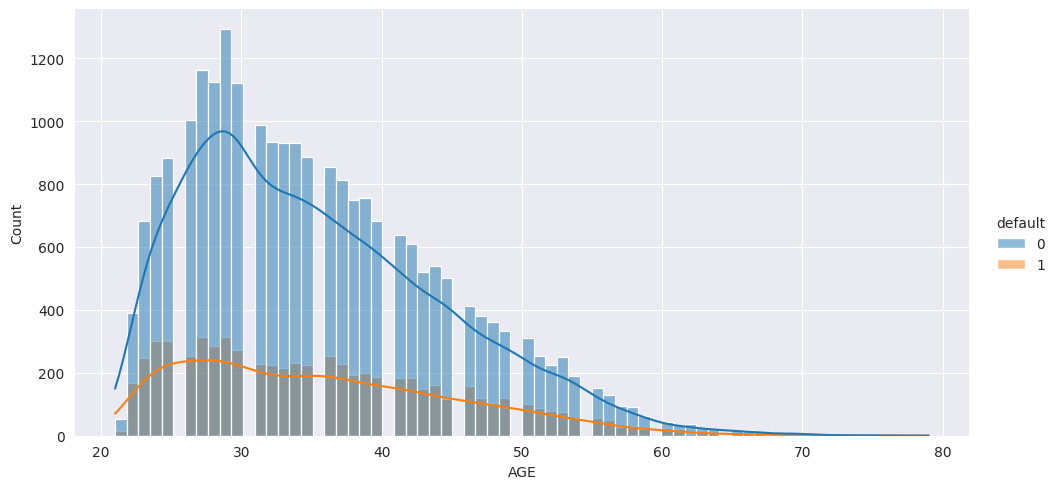

In [231]:
sns.displot(data=df, x="AGE",hue="default",kde=True,height=5, aspect=2)

# Data Pre-Processing

In [232]:
for x in df:
    print(x,":",df[x].corr(df['default']))

ID : -0.013951954838986274
LIMIT_BAL : -0.15351987639350784
SEX : -0.03996057770544169
EDUCATION : 0.02800607765624999
MARRIAGE : -0.02433921568340422
AGE : 0.013889834301963234
PAY_0 : 0.3247937284786229
PAY_2 : 0.26355120167216534
PAY_3 : 0.23525251372491626
PAY_4 : 0.2166136368424247
PAY_5 : 0.2041489138761666
PAY_6 : 0.1868663616535451
BILL_AMT1 : -0.01964419714322157
BILL_AMT2 : -0.014193218088215743
BILL_AMT3 : -0.014075518043214783
BILL_AMT4 : -0.010156495880289699
BILL_AMT5 : -0.006760463841014733
BILL_AMT6 : -0.005372314914815528
PAY_AMT1 : -0.07292948777785141
PAY_AMT2 : -0.05857870658290109
PAY_AMT3 : -0.05625035099033122
PAY_AMT4 : -0.056827400892887805
PAY_AMT5 : -0.05512351562108851
PAY_AMT6 : -0.053183340326128134
default : 1.0


<AxesSubplot: >

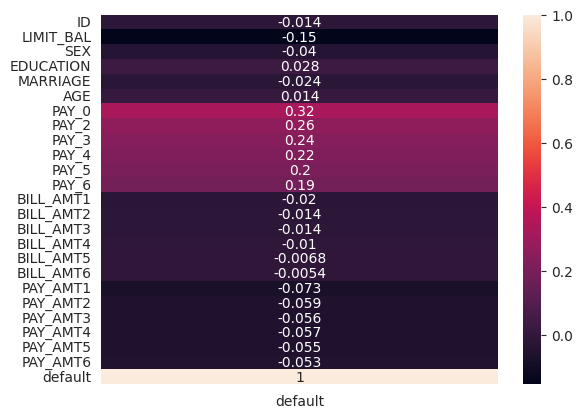

In [233]:
corr = df.corr()[['default']]
sns.heatmap(corr, annot=True)

In [234]:
for x in df:
    corr_val=df[x].corr(df['default'])
    if corr_val>=0.1 or corr_val<=-0.1:
        print(x)
    

LIMIT_BAL
PAY_0
PAY_2
PAY_3
PAY_4
PAY_5
PAY_6
default


In [235]:
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


In [236]:
dataset=pd.DataFrame({"LIMIT_BAL":df["LIMIT_BAL"],"SEX":df["SEX"],"EDUCATION":df["EDUCATION"],"MARRIAGE":df["MARRIAGE"],"AGE":df["AGE"],"PAY_0":df["PAY_0"],"PAY_2":df["PAY_2"],"PAY_3":df["PAY_3"],"PAY_4":df["PAY_4"],"PAY_5":df["PAY_5"],"PAY_6":df["PAY_6"],"PAY_AMT1":df["PAY_AMT1"],"PAY_AMT2":df["PAY_AMT2"],"PAY_AMT3":df["PAY_AMT3"],"PAY_AMT4":df["PAY_AMT4"],"PAY_AMT5":df["PAY_AMT5"],"PAY_AMT6":df["PAY_AMT6"],"default":df["default"]})

In [237]:
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [238]:
dataset.shape

(30000, 18)

## LIMIT_BAL

<AxesSubplot: xlabel='default', ylabel='LIMIT_BAL'>

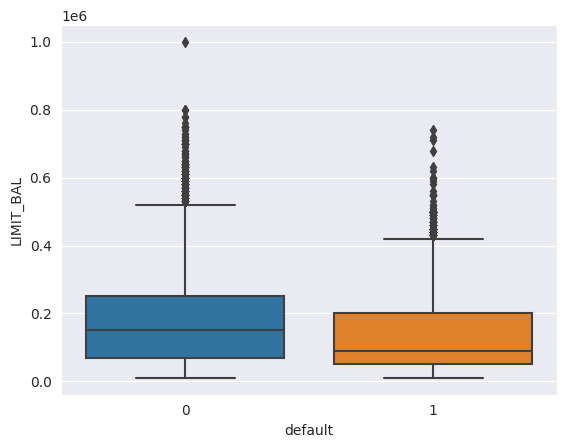

In [239]:
sns.boxplot(x="default",y="LIMIT_BAL",data=df)

In [240]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## PAY_0

In [241]:
df["PAY_0"].unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6])

In [242]:
df["PAY_0"].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

<AxesSubplot: xlabel='PAY_0', ylabel='count'>

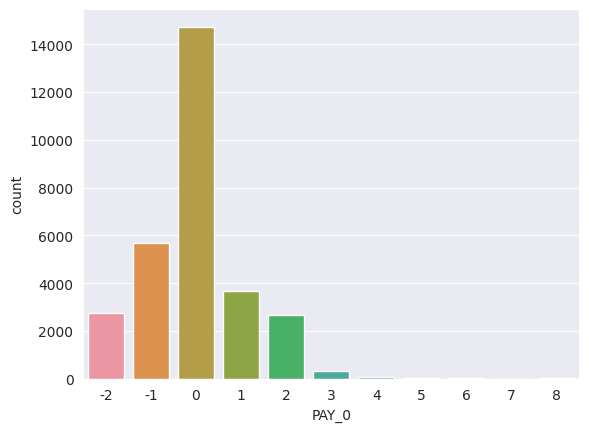

In [243]:
sns.countplot(x="PAY_0",data=df)

## PAY_2

In [244]:
df["PAY_2"].unique()

array([ 2,  0, -1, -2,  3,  5,  7,  4,  1,  6,  8])

In [245]:
df["PAY_2"].value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

<AxesSubplot: xlabel='PAY_2', ylabel='count'>

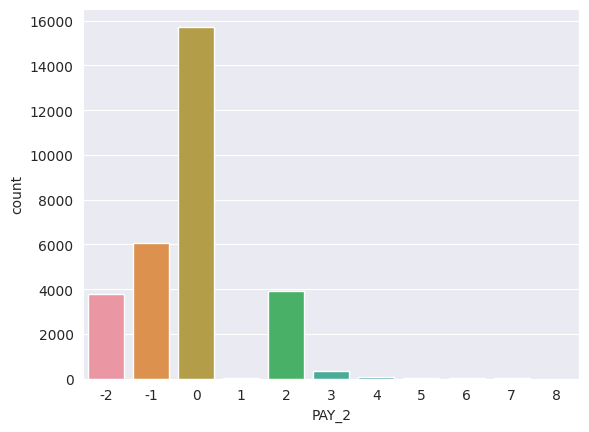

In [246]:
sns.countplot(x="PAY_2",data=df)

## PAY_3

In [247]:
df["PAY_3"].unique()

array([-1,  0,  2, -2,  3,  4,  6,  7,  1,  5,  8])

In [248]:
df["PAY_3"].value_counts()

 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64

<AxesSubplot: xlabel='PAY_3', ylabel='count'>

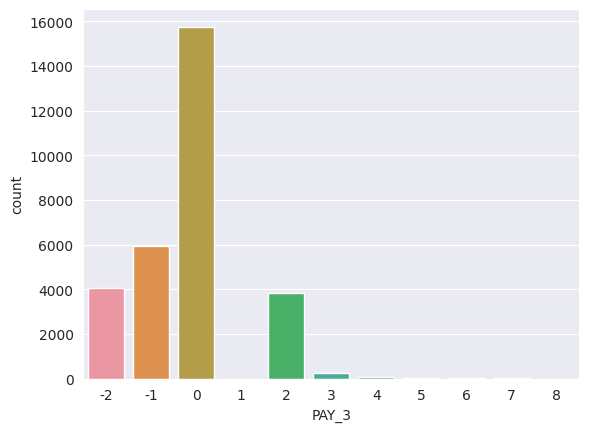

In [249]:
sns.countplot(x="PAY_3",data=df)

## PAY_4

In [250]:
df["PAY_4"].unique()

array([-1,  0, -2,  2,  3,  4,  5,  7,  6,  1,  8])

In [251]:
df["PAY_4"].value_counts()

 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: PAY_4, dtype: int64

<AxesSubplot: xlabel='PAY_4', ylabel='count'>

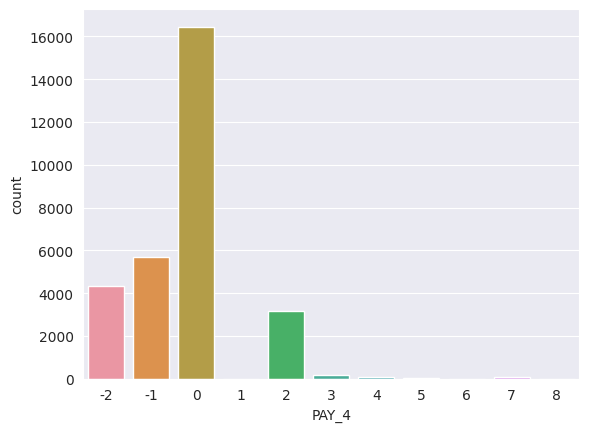

In [252]:
sns.countplot(x="PAY_4",data=df)

## PAY_5

In [253]:
df["PAY_5"].unique()

array([-2,  0, -1,  2,  3,  5,  4,  7,  8,  6])

In [254]:
df["PAY_5"].value_counts()

 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64

<AxesSubplot: xlabel='PAY_5', ylabel='count'>

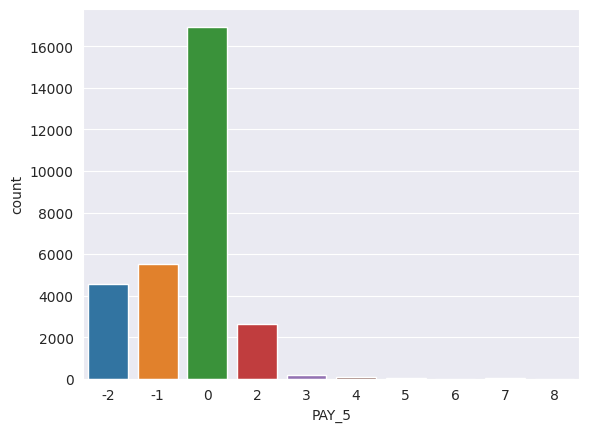

In [255]:
sns.countplot(x="PAY_5",data=df)

## PAY_6

In [256]:
df["PAY_6"].unique()

array([-2,  2,  0, -1,  3,  6,  4,  7,  8,  5])

In [257]:
df["PAY_6"].value_counts()

 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64

<AxesSubplot: xlabel='PAY_6', ylabel='count'>

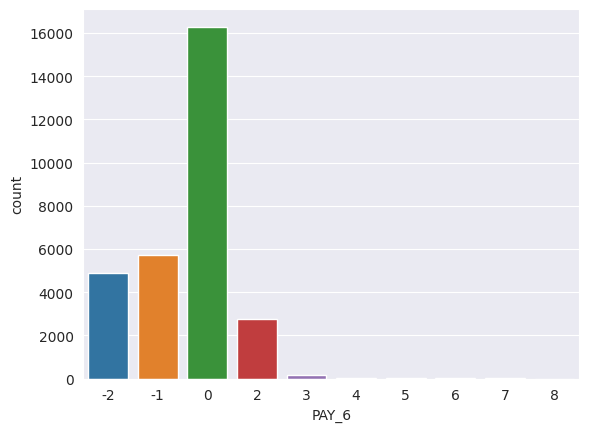

In [258]:
sns.countplot(x="PAY_6",data=df)

In [259]:
dataset["default"].value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [260]:
# # Dividing dependent and independent variables
X =dataset.drop("default", axis=1)
y = dataset["default"]

In [261]:
# Sampling
from imblearn.over_sampling import SMOTE 
from collections import Counter

sampler = SMOTE()
X, y = sampler.fit_resample(X, y)

print('SMOTE {}'.format(Counter(y)))

SMOTE Counter({1: 23364, 0: 23364})


In [262]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Logistic Regression

In [263]:
from sklearn.linear_model import LogisticRegression  

classifier= LogisticRegression(random_state=0)  
lr_model=classifier.fit(X_train, y_train)
y_pred=lr_model.predict(X_test)

In [264]:
# Accuracy = TP+TN/TP+FP+FN+TN
# Precision = TP/TP+FP
# Recall = TP/TP+FN
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)


from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.50      0.55      4664
           1       0.58      0.69      0.63      4682

    accuracy                           0.60      9346
   macro avg       0.60      0.60      0.59      9346
weighted avg       0.60      0.60      0.59      9346



Text(50.722222222222214, 0.5, 'Actual Label')

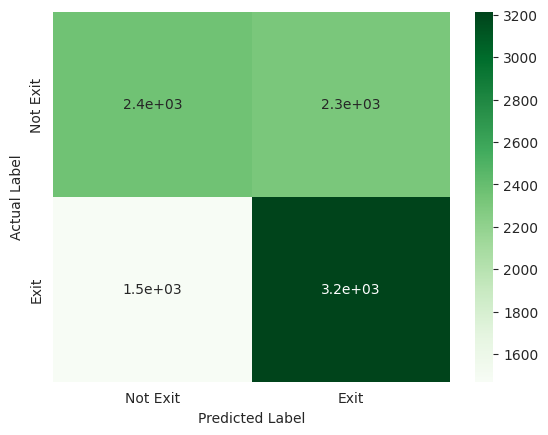

In [265]:
x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

## Decision Tree

In [266]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt_model = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dt_model.predict(X_test)

In [267]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      4664
           1       0.74      0.75      0.74      4682

    accuracy                           0.74      9346
   macro avg       0.74      0.74      0.74      9346
weighted avg       0.74      0.74      0.74      9346



Text(50.722222222222214, 0.5, 'Actual Label')

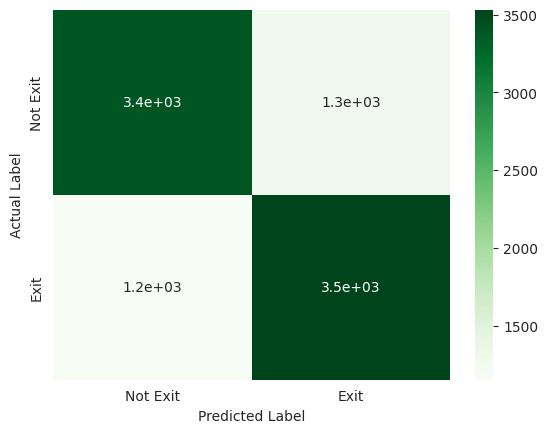

In [268]:

x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

## KNN 

In [269]:
from sklearn.neighbors import KNeighborsClassifier

clf= KNeighborsClassifier(n_neighbors=25)

# Train the model using the training sets
knn_model=clf.fit(X_train,y_train)

y_pred=knn_model.predict(X_test)


In [270]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.60      0.64      4664
           1       0.65      0.74      0.69      4682

    accuracy                           0.67      9346
   macro avg       0.67      0.67      0.67      9346
weighted avg       0.67      0.67      0.67      9346



Text(50.722222222222214, 0.5, 'Actual Label')

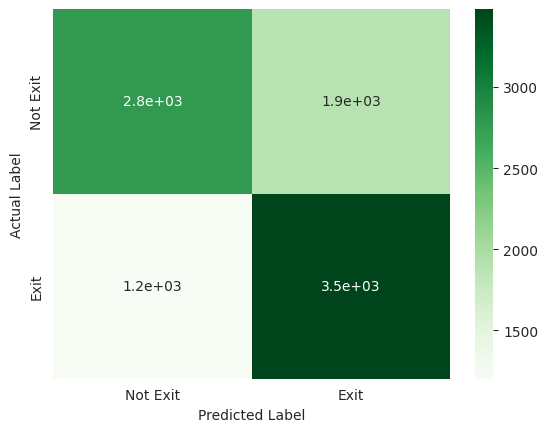

In [271]:
x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

## Random Forest 

In [272]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,random_state=0)
rf_model=clf.fit(X_train, y_train)
y_pred=rf_model.predict(X_test)

In [273]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      4664
           1       0.84      0.80      0.82      4682

    accuracy                           0.83      9346
   macro avg       0.83      0.83      0.83      9346
weighted avg       0.83      0.83      0.83      9346



In [274]:
confusion_matrix(y_test,y_pred)

array([[3964,  700],
       [ 920, 3762]])

Text(50.722222222222214, 0.5, 'Actual Label')

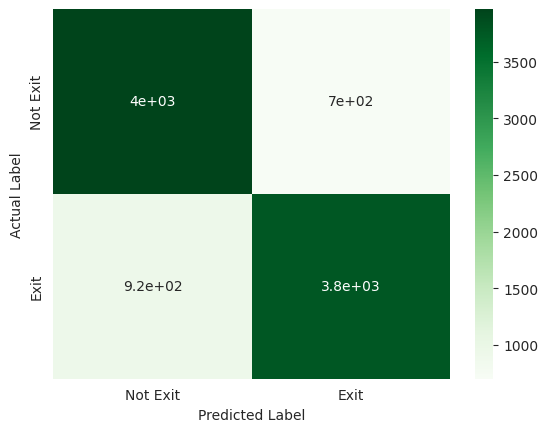

In [275]:
x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

## SVM

In [276]:
from sklearn.svm import LinearSVC as svc

svm_model = svc().fit(X_train, y_train)
y_pred=svm_model.predict(X_test)

/home/asif/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [277]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.04      0.07      4664
           1       0.51      0.98      0.67      4682

    accuracy                           0.51      9346
   macro avg       0.59      0.51      0.37      9346
weighted avg       0.59      0.51      0.37      9346



## XG Boost

In [278]:
from xgboost import XGBClassifier


# fit model no training data
clf = XGBClassifier(
              learning_rate=0.300000012,n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             )
xgboost_model=clf.fit(X_train, y_train)

y_pred=xgboost_model.predict(X_test)


In [279]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      4664
           1       0.83      0.79      0.81      4682

    accuracy                           0.81      9346
   macro avg       0.81      0.81      0.81      9346
weighted avg       0.81      0.81      0.81      9346



# Saving Model 